In [3]:
# this snippet will ignore all the error outputs on the notebook
import warnings
warnings.filterwarnings('ignore')

In [4]:
import requests
import pandas as pd
from typing import Dict

In [5]:
dt = '2019-10-10'
url = f"https://api.data.gov.sg/v1/environment/air-temperature?date={dt}"

In [6]:
resp = requests.get(url)

In [7]:
resp.json() #parses content as JSON objects

{'metadata': {'stations': [{'id': 'S109',
    'device_id': 'S109',
    'name': 'Ang Mo Kio Avenue 5',
    'location': {'latitude': 1.3764, 'longitude': 103.8492}},
   {'id': 'S117',
    'device_id': 'S117',
    'name': 'Banyan Road',
    'location': {'latitude': 1.256, 'longitude': 103.679}},
   {'id': 'S50',
    'device_id': 'S50',
    'name': 'Clementi Road',
    'location': {'latitude': 1.3337, 'longitude': 103.7768}},
   {'id': 'S107',
    'device_id': 'S107',
    'name': 'East Coast Parkway',
    'location': {'latitude': 1.3135, 'longitude': 103.9625}},
   {'id': 'S43',
    'device_id': 'S43',
    'name': 'Kim Chuan Road',
    'location': {'latitude': 1.3399, 'longitude': 103.8878}},
   {'id': 'S108',
    'device_id': 'S108',
    'name': 'Marina Gardens Drive',
    'location': {'latitude': 1.2799, 'longitude': 103.8703}},
   {'id': 'S44',
    'device_id': 'S44',
    'name': 'Nanyang Avenue',
    'location': {'latitude': 1.34583, 'longitude': 103.68166}},
   {'id': 'S121',
    'dev

# Data Cleaning process

Select a station from the raw data list. Add the respective timestamps and temperatures for each recording.
Append them to a list.

In [10]:
station = 'S117'
output = []
for item in _7['items']:
    ts = item['timestamp']
    try:
        temperature = [temp['value'] for temp in item['readings'] if temp['station_id'] == station][0]
    except IndexError:
        pass
    output.append({
        'time': ts,
        'temp': temperature,
    })

In [11]:
output

[{'time': '2019-10-10T00:01:00+08:00', 'temp': 27.8},
 {'time': '2019-10-10T00:02:00+08:00', 'temp': 27.8},
 {'time': '2019-10-10T00:03:00+08:00', 'temp': 27.8},
 {'time': '2019-10-10T00:04:00+08:00', 'temp': 27.8},
 {'time': '2019-10-10T00:05:00+08:00', 'temp': 27.8},
 {'time': '2019-10-10T00:06:00+08:00', 'temp': 27.7},
 {'time': '2019-10-10T00:07:00+08:00', 'temp': 27.7},
 {'time': '2019-10-10T00:08:00+08:00', 'temp': 27.7},
 {'time': '2019-10-10T00:09:00+08:00', 'temp': 27.7},
 {'time': '2019-10-10T00:10:00+08:00', 'temp': 27.7},
 {'time': '2019-10-10T00:11:00+08:00', 'temp': 27.7},
 {'time': '2019-10-10T00:12:00+08:00', 'temp': 27.7},
 {'time': '2019-10-10T00:13:00+08:00', 'temp': 27.7},
 {'time': '2019-10-10T00:14:00+08:00', 'temp': 27.7},
 {'time': '2019-10-10T00:15:00+08:00', 'temp': 27.7},
 {'time': '2019-10-10T00:16:00+08:00', 'temp': 27.7},
 {'time': '2019-10-10T00:17:00+08:00', 'temp': 27.7},
 {'time': '2019-10-10T00:18:00+08:00', 'temp': 27.7},
 {'time': '2019-10-10T00:19:

# Converting data cleaning into a node

Make a DataFrame using Pandas.

<AxesSubplot:xlabel='time'>

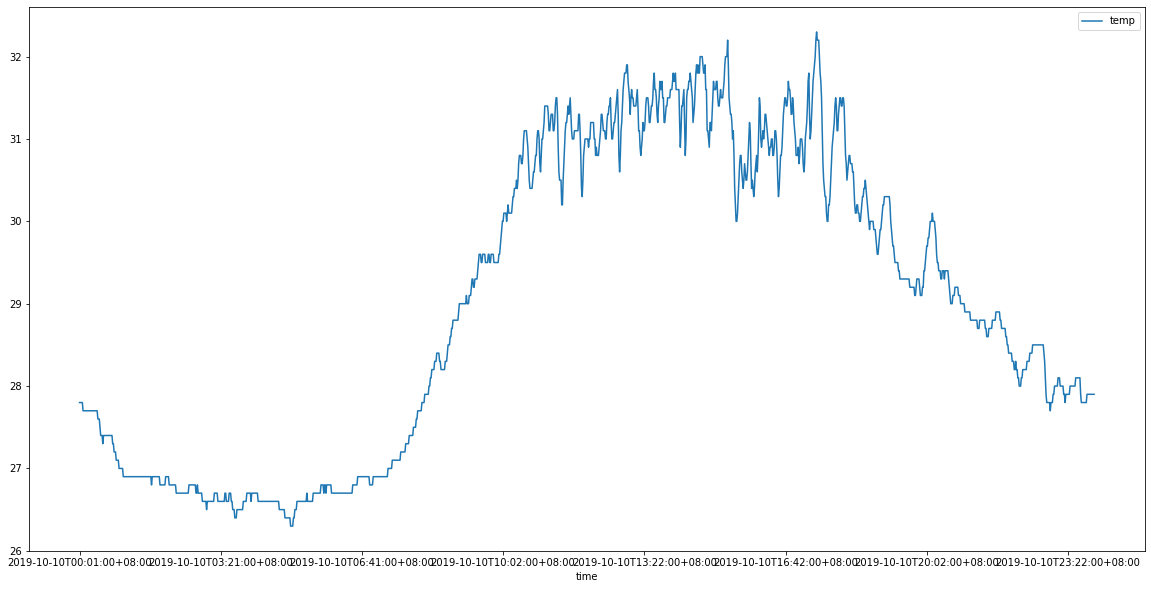

In [12]:
pd.DataFrame(output).plot(x='time', figsize = (20, 10))

Let's import this notebook into a Kedro project to start building the pipelines. The steps are:
1. decompose parts of the pipeline
    - fetch data becomes a node function
    - data cleaning becomes a node function as well

In [16]:
import requests

def get_temp_data(dt = '2019-10-10'):
    url = f"https://api.data.gov.sg/v1/environment/air-temperature?date={dt}"
    resp = requests.get(url)
    return resp.json()

In [15]:
from typing import Dict
import pandas as pd


def choose_station():
    output = []
    for item in _11['items']:
        ts = item['timestamp']
        try:
            temperature = [temp['value'] for temp in item['readings'] if temp['station_id'] == station][0]
        except IndexError:
            pass
        output.append({
            'time': ts,
            'temp': temperature,
        })
    return pd.DataFrame(output)

In [ ]:
station_id = S117

Then `View` > `Cell toolbar` > `tags`

In [17]:
# from typing import Dict
# import pandas as pd

# def choose_station(temp_Data: Dict, station_id: str):
#     station = 'S117'
#     output = []
#     for item in temp_Data['items']:
#         ts = item['timestamp']
#         try:
#             temperature = [temp['value'] for temp in item['readings'] if temp['station_id'] == station][0]
#         except IndexError:
#             pass
#         output.append({
#             'time': ts,
#             'temp': temperature,
#         })
#         return pd.DataFrame(output)

# Make a node to pull data from the API